In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
from citipy import citipy
# Import the time module.
import time

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf514395b8521d498c5fd09fe9b5b3ab


In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf514395b8521d498c5fd09fe9b5b3ab&q=Boston


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for i in range(len(cities)):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Processing Record 1 of Set 13 | amderma
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 13 | tezu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 13 | jumla
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 13 | yellowknife
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 13 | rikitea
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 13 | new norfolk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 13 | nome
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 13 | lompoc
-----------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 14 | sao joao da barra
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 14 | tidore
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 14 | nyurba
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 14 | ushuaia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 14 | mahebourg
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 14 | ovsyanka
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 14 | qaanaaq
-----------------------------
Data Retrieval

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 15 | vila franca do campo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 15 | muli
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 15 | karratha
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 15 | ilulissat
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 15 | kalmunai
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 15 | alghero
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 15 | klaksvik
-----------------------------
Data Retrieval Complete      
--------

City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 16 | thompson
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 16 | diapaga
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 16 | sur
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 16 | mabaruma
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 16 | illoqqortoormiut
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 16 | waingapu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 16 | shubarkuduk
---------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 17 | ulladulla
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 17 | hudson bay
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 17 | hanstholm
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 17 | tortoli
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 18 | cap-aux-meules
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 18 | neepawa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 18 | narsaq
-----------------------------
Data Retrieval Complete      
-------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 19 | shenjiamen
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 19 | caiaponia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 19 | bacuit
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 19 | auki
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 19 | nuuk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 19 | victoria
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 19 | praia da vitoria
-----------------------------
Data Retrieval Comp

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 20 | mount gambier
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 20 | saskylakh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 20 | contamana
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 20 | mpika
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 20 | khasan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 20 | tilichiki
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 20 | walvis bay
-----------------------------
Data Retrieval Complete      
-----------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 21 | yulara
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 33 of Set 21 | pemangkat
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 34 of Set 21 | wiarton
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 35 of Set 21 | scottsbluff
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 21 | carutapera
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 21 | monchegorsk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 21 | san patricio
-----------------------------
Data Retrieval Complete      
------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 22 | bialong
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 22 | luena
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 45 of Set 22 | uyuni
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 46 of Set 22 | fevik
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 22 | taikang
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 22 | cayenne
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 22 | mys shmidta
City not found. Skipping...
-----------------------------
Data Retrieval Complete    

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 24 | rungata
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 24 | terra roxa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 24 | rio verde de mato grosso
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 24 | nayagarh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 24 | tabuk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 24 | raisinghnagar
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 24 | correntina
-----------------------------
Da

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 25 | geraldton
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 25 | burnie
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 25 | zhangye
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 25 | chara
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 25 | bayir
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 25 | vanimo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 25 | altamira
-----------------------------
Data Retrieval Complete      
--------------------------

In [11]:
city_data

[{'City': 'Tezu',
  'Lat': 27.92,
  'Lng': 96.17,
  'Max Temp': 70.84,
  'Humidity': 64,
  'Cloudiness': 22,
  'Wind Speed': 3.8,
  'Country': 'IN',
  'Date': '2020-04-17 14:54:44'},
 {'City': 'Jumla',
  'Lat': 29.27,
  'Lng': 82.18,
  'Max Temp': 51.3,
  'Humidity': 31,
  'Cloudiness': 85,
  'Wind Speed': 0.65,
  'Country': 'NP',
  'Date': '2020-04-17 14:54:44'},
 {'City': 'Yellowknife',
  'Lat': 62.46,
  'Lng': -114.35,
  'Max Temp': 28.4,
  'Humidity': 79,
  'Cloudiness': 75,
  'Wind Speed': 18.34,
  'Country': 'CA',
  'Date': '2020-04-17 14:54:44'},
 {'City': 'Rikitea',
  'Lat': -23.12,
  'Lng': -134.97,
  'Max Temp': 76.86,
  'Humidity': 66,
  'Cloudiness': 50,
  'Wind Speed': 7.16,
  'Country': 'PF',
  'Date': '2020-04-17 14:51:03'},
 {'City': 'New Norfolk',
  'Lat': -42.78,
  'Lng': 147.06,
  'Max Temp': 51.01,
  'Humidity': 74,
  'Cloudiness': 54,
  'Wind Speed': 7,
  'Country': 'AU',
  'Date': '2020-04-17 14:54:45'},
 {'City': 'Nome',
  'Lat': 64.5,
  'Lng': -165.41,
  'Max Te

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tezu,27.92,96.17,70.84,64,22,3.80,IN,2020-04-17 14:54:44
1,Jumla,29.27,82.18,51.30,31,85,0.65,NP,2020-04-17 14:54:44
2,Yellowknife,62.46,-114.35,28.40,79,75,18.34,CA,2020-04-17 14:54:44
3,Rikitea,-23.12,-134.97,76.86,66,50,7.16,PF,2020-04-17 14:51:03
4,New Norfolk,-42.78,147.06,51.01,74,54,7.00,AU,2020-04-17 14:54:45
5,Nome,64.50,-165.41,34.00,100,90,8.05,US,2020-04-17 14:54:45
6,Lompoc,34.64,-120.46,55.40,87,90,3.36,US,2020-04-17 14:54:30
7,Albany,42.60,-73.97,44.01,27,95,4.00,US,2020-04-17 14:50:34
8,Shimoda,34.67,138.95,53.01,92,100,18.88,JP,2020-04-17 14:54:47
9,Puerto Ayora,-0.74,-90.35,75.99,94,90,4.70,EC,2020-04-17 14:54:36


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Get today's date in seconds.
today = time.time()
today

1587135445.7475631

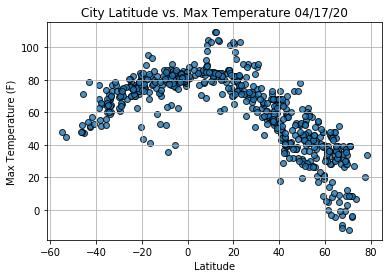

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()